In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [19]:
def hp_filter(df, value=9.8, field="z", cutoff=3):
    """Returns new dataframe with field replaced with filtered values"""
    df1 = df.copy()
    df1.z = np.where(abs(df[field] - value)> cutoff, df[field], value)
    return df1

In [2]:
bump_raw = pd.read_csv('./sensorlab_2018-10-14-07.37.10-bump/accelerometer.csv')
pothole_raw = pd.read_csv('./sensorlab_2018-10-14-07.36.28-pothole/accelerometer.csv')

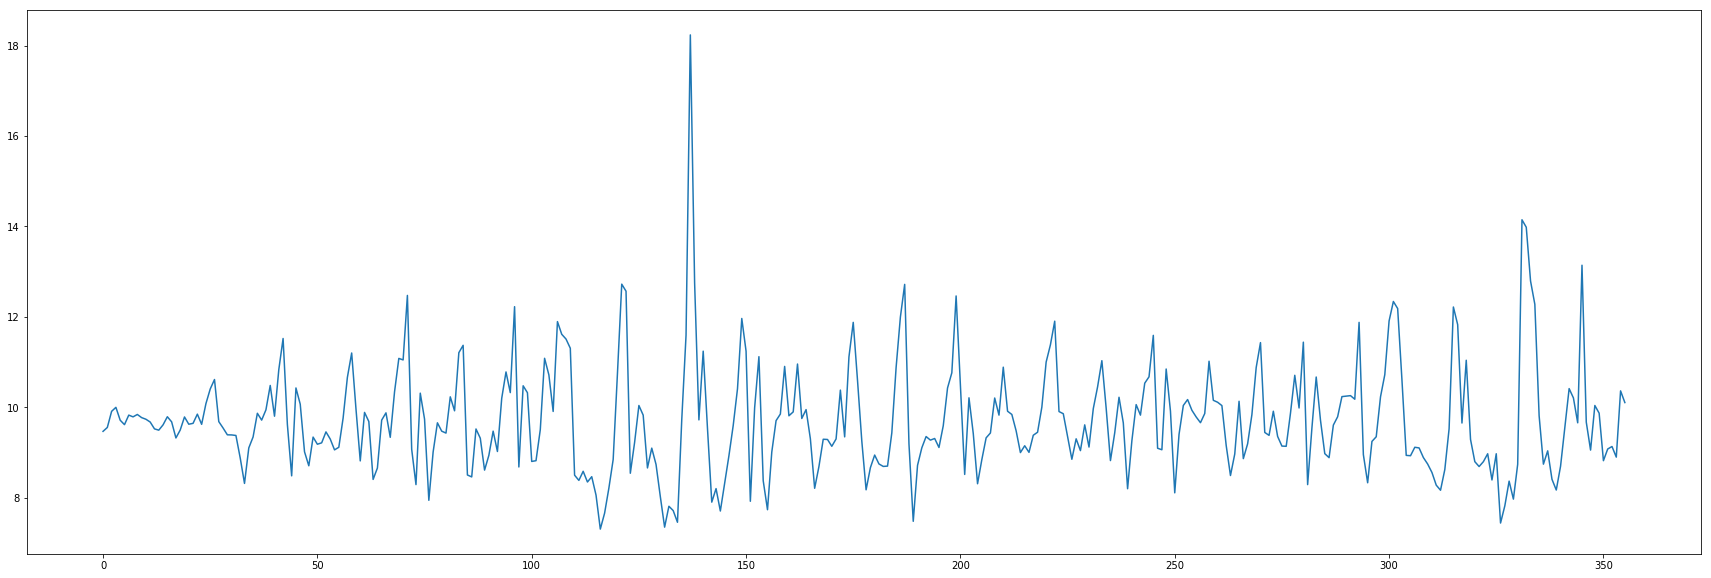

In [6]:
bump_raw.z.plot(figsize=(30,10))

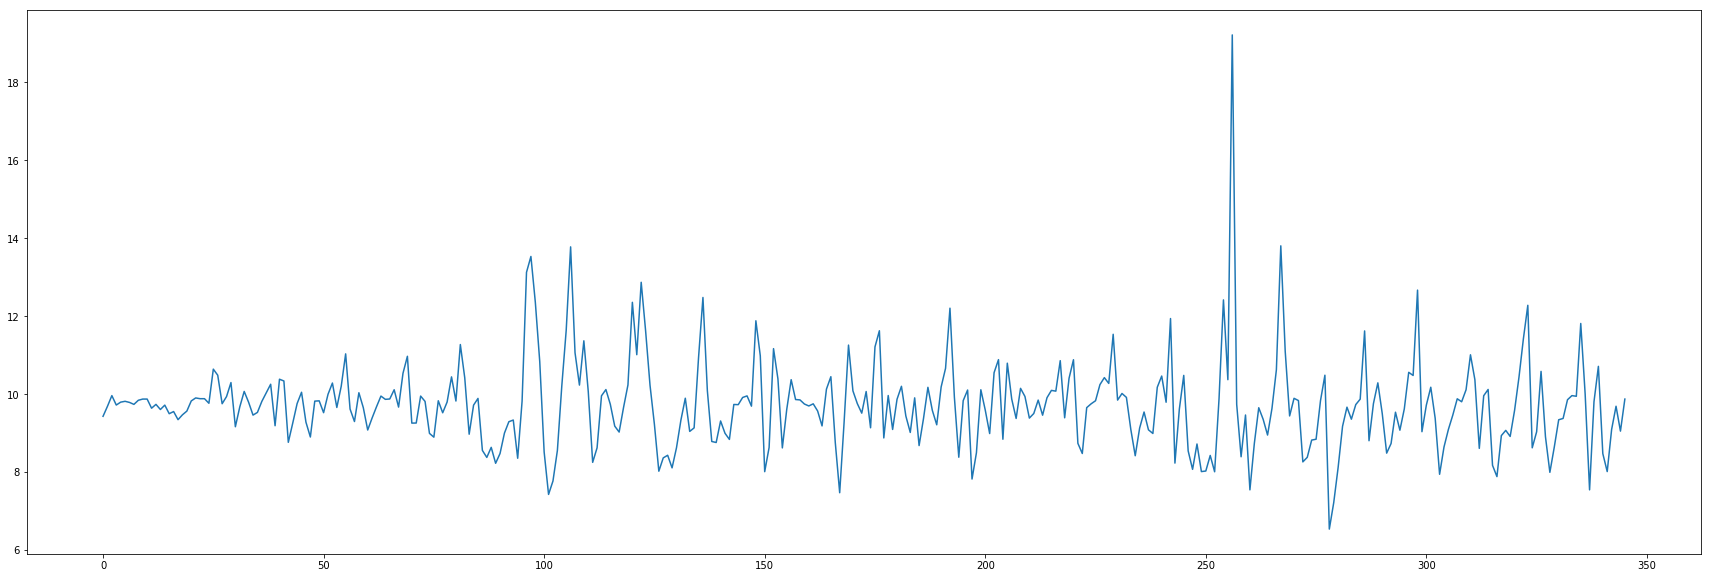

In [18]:
pothole_raw.z.plot(figsize=(30,10))

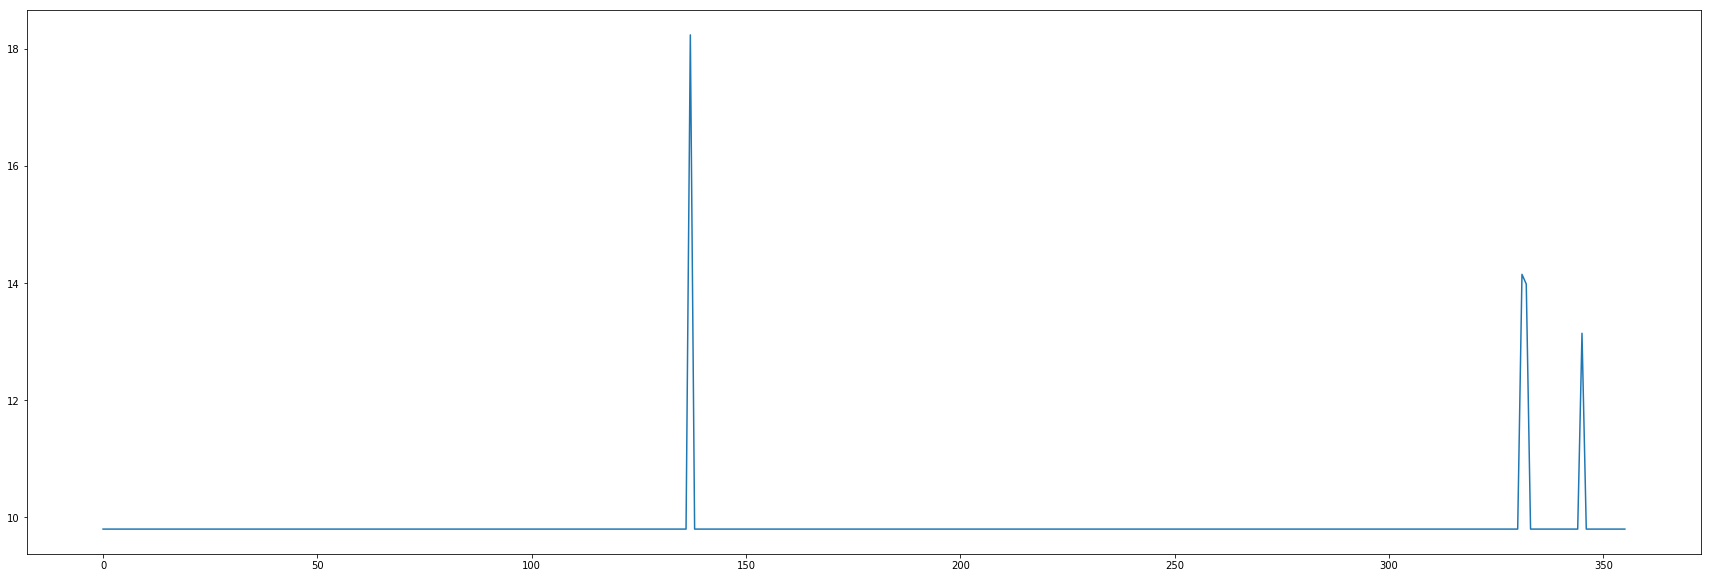

In [20]:
hp_filter(bump_raw).z.plot(figsize=(30,10))

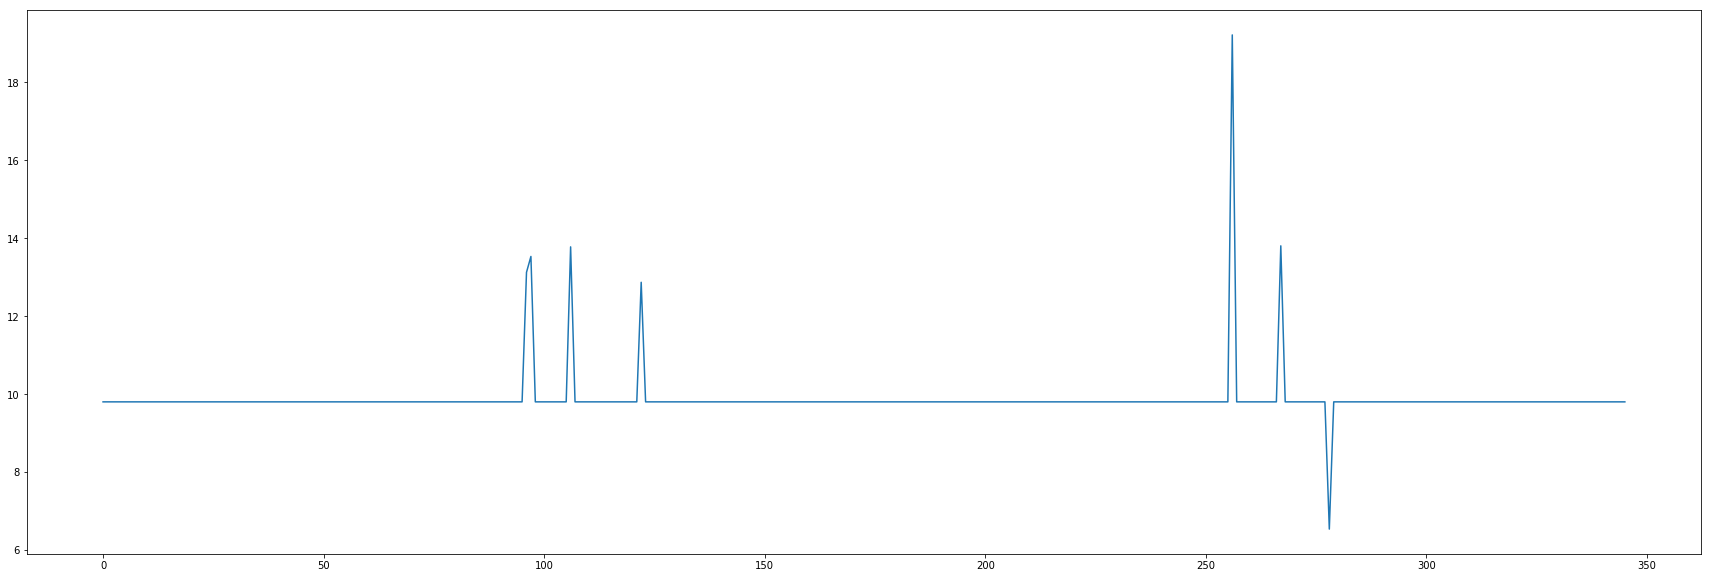

In [22]:
hp_filter(pothole_raw).z.plot(figsize=(30,10))

In [31]:
import json
pothole_info = None
bump_info = None
with open('./sensorlab_2018-10-14-07.36.28-pothole/_info.json') as f:
    pothole_info = json.loads(f.read())
with open('./sensorlab_2018-10-14-07.37.10-bump/_info.json') as f:
    bump_info = json.loads(f.read())
    
print(pothole_info['start'], pothole_info['end'])
print(bump_info['start'], bump_info['end'])
print('resolution is', 50)

1539482788036 1539482805330
1539482830457 1539482848242
resolution is 50


In [77]:
bump_a = hp_filter(bump_raw, cutoff=2).z - 9.8
pothole_a = hp_filter(pothole_raw, cutoff=2).z - 9.8

In [55]:
def acc_to_vel(acc, time):
    v = 0
    prev_t = 0
    vel = []
    for a, t in zip(acc, time):
        v = v + a * ((t - prev_t) / 1000)
        vel.append(v)
        prev_t = t
    return vel

In [63]:
bump_v = acc_to_vel(bump_a, bump_raw.time)
# bump_v = acc_to_vel(bump_raw.z, bump_raw.time)
bump_s = acc_to_vel(bump_v, bump_raw.time)

pothole_v = acc_to_vel(pothole_a, pothole_raw.time)
pothole_s = acc_to_vel(pothole_v, pothole_raw.time)

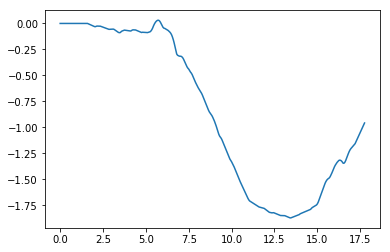

In [65]:
plt.plot(bump_raw.time/1000, bump_s)

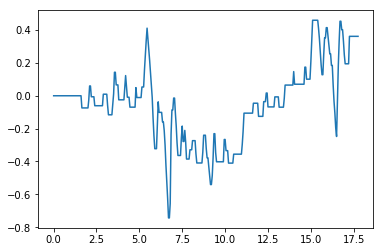

In [67]:
plt.plot(bump_raw.time/1000, bump_v)

In [98]:
def np_hp_filter(nparr, cutoff):
    filtered = [0 if x > cutoff else x for x in nparr]
    return np.array(filtered)

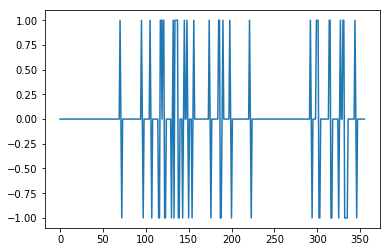

In [99]:
plt.plot(np.sign(np.gradient(bump_a)))

In [92]:
np.where(np.sign(np.gradient(bump_a)) == 1)

(array([ 70,  95, 105, 117, 118, 120, 121, 132, 134, 135, 136, 137, 145,
        148, 156, 174, 185, 186, 190, 198, 221, 292, 299, 300, 301, 314,
        315, 327, 330, 331, 344]),)

In [97]:
np.sign(np.gradient(bump_a))[70:110]

array([ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,
        0.])